In [1]:
from IPython.display import display
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FormatStrFormatter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import spacy

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', None)

%matplotlib inline


In [2]:
vd = pd.read_csv("/home/mikes/Windows/Documents/tmp/VAERS data deaths only.csv", 
                         delimiter = ",", 
                         encoding = "ISO-8859-1")

In [3]:
vd.columns


Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

# Age profile, reports of possible deaths VAERS

In [4]:
agesdf = vd[["AGE_YRS","VAERS_ID"]]
agesdf["COUNTS"] = agesdf["AGE_YRS"].value_counts()
agesdf = agesdf.sort_values(by=["AGE_YRS"], ascending=True).reset_index()
agesdf.rename({'index': 'ORIG_INDEX',}, axis=1, inplace=True)
#agesdf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# Obviously no one is vaccinating children below the age of 1. Assuming this data mis-entered.
# Data less than age 13 is suspect
# AGE_YRS == NaN is, of course, removed for age related statistics
# This data is removed exclusively for age-related charting
munge = agesdf["AGE_YRS"]>=13
falsecounts = munge.value_counts()[False]
print("Removing '{}' rows of data from '{}' (expected remaining '{}')".format(
    falsecounts, 
    agesdf.shape[0], 
    agesdf.shape[0] - falsecounts))
mungedagesdf = agesdf[munge]
print("Columns remaining: '{}'".format(mungedagesdf.shape[0]))
print(); print("=== DATA REMOVED ===")
display(agesdf[~munge])

Removing '424' rows of data from '5184' (expected remaining '4760')
Columns remaining: '4760'

=== DATA REMOVED ===


,ORIG_INDEX,AGE_YRS,VAERS_ID,COUNTS
0,4044,0.08,1295988,NaN
1,1363,0.17,1068793,NaN
2,3078,0.17,1210904,NaN
3,4909,0.17,1400223,NaN
4,5064,0.17,1418051,NaN
5,5010,0.17,1414392,NaN
6,4509,0.17,1350788,NaN
7,4932,0.17,1403610,NaN
8,4467,0.33,1346587,NaN
9,2622,0.42,1166062,NaN


In [6]:
# Python program to find elements that are larger than
# half of the elements in array
# Prints elements larger than n/2 element
def percent_quartile(arr, percent=50):
    
    if percent > 1: 
        percent = percent / 100 # Convert to decimal 

    pecent = 1-percent # I.e. to get the 25% quartile, this should be 0.75    
    n = len(arr)
    result = []

    # Sort the array in ascending order
    x = sorted(arr)
 
    # Print last ceil(n/2) elements
    for i in range(int(n*percent),n):
        result.append(x[i])
    
    # Returns list of all elements within the quartile
    return result
 

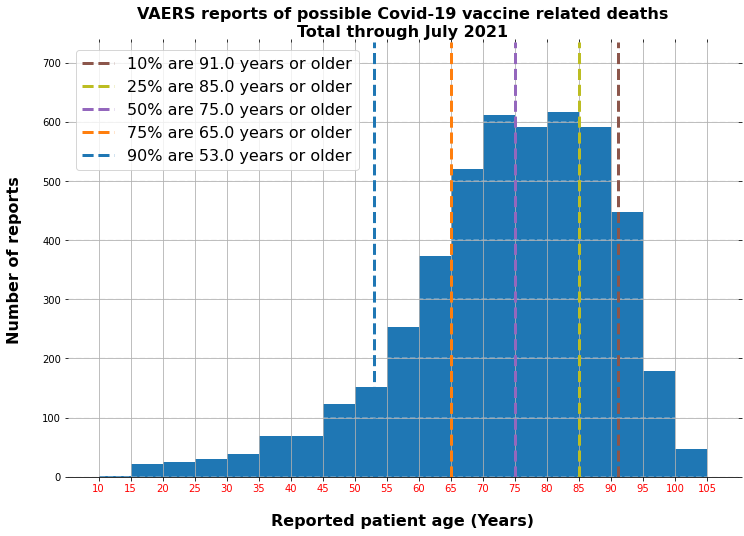

In [7]:
ax = mungedagesdf.hist(column='AGE_YRS', figsize=(12,8), bins=[b for b in range(10, 110, 5)])
ax = ax[0]
plt.xticks([b for b in range(10, 110, 5)], color='red')

c = ['tab:blue', 'tab:orange', 'tab:purple', 'tab:olive', 'tab:brown']
for q in [90, 75, 50, 25, 10]:
    arr = mungedagesdf["AGE_YRS"].to_list()
    result = percent_quartile(arr, q) # LARGEST x% of values 
    _quartile = result[0] # Take first element to get the LOWEST value included in quartile
    plt.axvline(_quartile, color=c.pop(), linestyle='dashed', linewidth=3, 
                label="{}% are {} years or older".format(100-q, _quartile))

plt.legend(prop={'size': 16})

for x in ax: # For each subplot

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", 
                  labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Title
    x.set_title("VAERS reports of possible Covid-19 vaccine related deaths\nTotal through July 2021", 
               weight='bold', size=16)

    # Set x-axis label
    x.set_xlabel("Reported patient age (Years)", labelpad=20, weight='bold', size=16)

    # Set y-axis label
    x.set_ylabel("Number of reports", labelpad=20, weight='bold', size=16)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
